# Question 1
In the data folder under ”problem_data”, load the file
problem_3_data.csv
1) Identify the appropriate equation to fit the data.
2) Plot the histogram of the data along with the p(x) over it, showing that they are a good match.

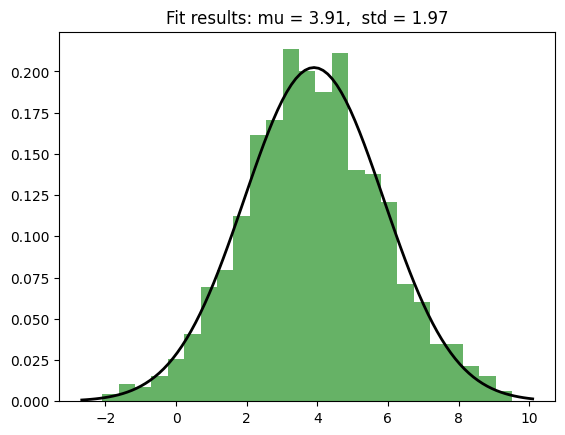

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw5/problem_3_data.csv')

mu, std = norm.fit(data['7.53'])
plt.hist(data['7.53'], bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


# Question 2

Question 2. In the data folder under ”problem_data”, load the file
problem_4_data.csv
1) Use KDE to model this distribution.
2) Plot the histogram of the data along with the p(x) over it, showing that they are a good match.

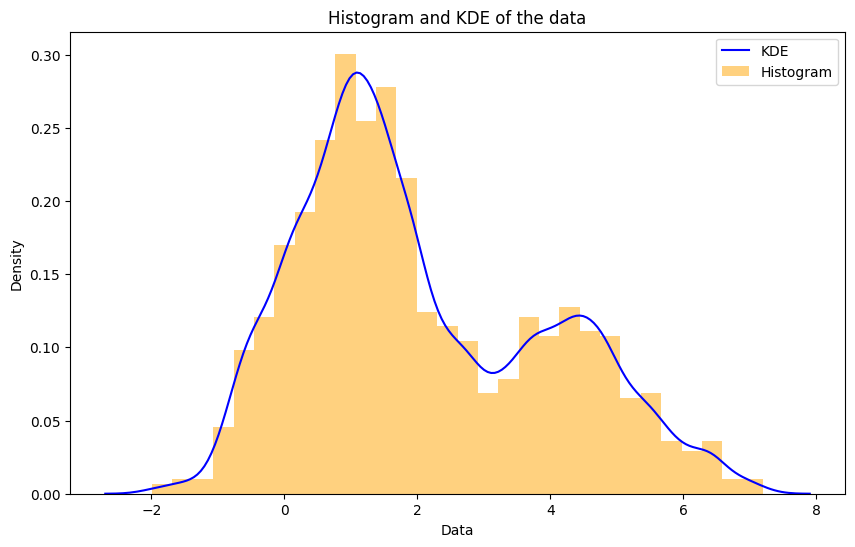

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw5/problem_4_data.csv')

plt.figure(figsize=(10, 6))
sns.kdeplot(data['1.56'], bw_adjust=0.5, label='KDE', color='blue')

plt.hist(data['1.56'], bins=30, density=True, alpha=0.5, color='orange', label='Histogram')
plt.title('Histogram and KDE of the data')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()


Question 3. Given the following integral and its result.
Z 2
0
x
2 − 3x + 4 dx =
14
3

1) Use numpy automatic integration and print out your integration result (It should be 14/3).
2) Treat f(x) = x

2 − 3x + 4, use numpy sampling from a uniform distribution to approximate the integral.

• Hint: Treat p(x) simply as a uniform distribution within the integral

Z 2
0
f(x)p(x) dx

3) • instead of generating uniform distribution samples directly from python, use rejection sampling to
generate uniform distribution samples to solve the integral.
4) • Use importance sampling to solve the integral.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def f(x):
    return x**2 - 3*x + 4

result_automatic, error = integrate.quad(f, 0, 2)
print("Automatic integration result:", result_automatic)

n_samples = 10000
samples = np.random.uniform(0, 2, n_samples)
f_samples = f(samples)
approx_integral = (2 - 0) * np.mean(f_samples)
print("Integral approximation via uniform sampling:", approx_integral)

def rejection_sampling(n_samples, f_max=4, a=0, b=2):
    accepted_samples = []
    while len(accepted_samples) < n_samples:
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, f_max)
        if y <= f(x):
            accepted_samples.append(x)
    return np.array(accepted_samples)

rejection_samples = rejection_sampling(n_samples)
rejection_f_samples = f(rejection_samples)
rejection_approx_integral = (2 - 0) * np.mean(rejection_f_samples)
print("Integral approximation via rejection sampling:", rejection_approx_integral)

def importance_sampling(n_samples):
    x_samples = np.random.uniform(0, 2, n_samples)
    f_samples = f(x_samples)
    weights = np.ones_like(x_samples) / (2 - 0)
    return np.mean(f_samples / weights)

importance_approx_integral = importance_sampling(n_samples)
print("Integral approximation via importance sampling:", importance_approx_integral)


Automatic integration result: 4.666666666666666
Integral approximation via uniform sampling: 4.662798338344595
Integral approximation via rejection sampling: 5.039708197478622
Integral approximation via importance sampling: 4.700091121826503


# Question 4

Question 4. Frm the data folder, under ”probability distributions”, load complex_distribution.csv. We are
going to call this dataset the original data X.
1) (20pt) Use KDE with distributions covered in class to find p(x).
2) (20pt) Once you have p(x) from KDE, you are going to
• use p(x) and rejection sampling to generate your own samples. Let’s call your generated samples Xˆ.
• use p(x) and KDE sampling to generate your own samples. Let’s call your generated samples X ̄.
• Plot 3 histograms of X, X ̄ and Xˆ side by side. All 3 distributions should look very similar.
3) (20pt) Use the original samples X and approximate
(a) Expectation, E[X]
(b) Population Variance, V ar[X] or equivalently E[(x − μ)
2
].

(c) E[3x + 2], E[x

2 − 5x], E[2e
x + 1]

4) (20pt) Use the samples you generated Xˆ and approximate
(a) Expectation, E[X]
(b) Population Variance, V ar[X] or equivalently E[(x − μ)
2
].

(c) E[3x + 2], E[x

2 − 5x], E[2e
x + 1]

5) (20pt) Use the samples you generated X ̄ and approximate
(a) Expectation, E[X]
(b) Population Variance, V ar[X] or equivalently E[(x − μ)
2
].

(c) E[3x + 2], E[x

2 − 5x], E[2e
x + 1]

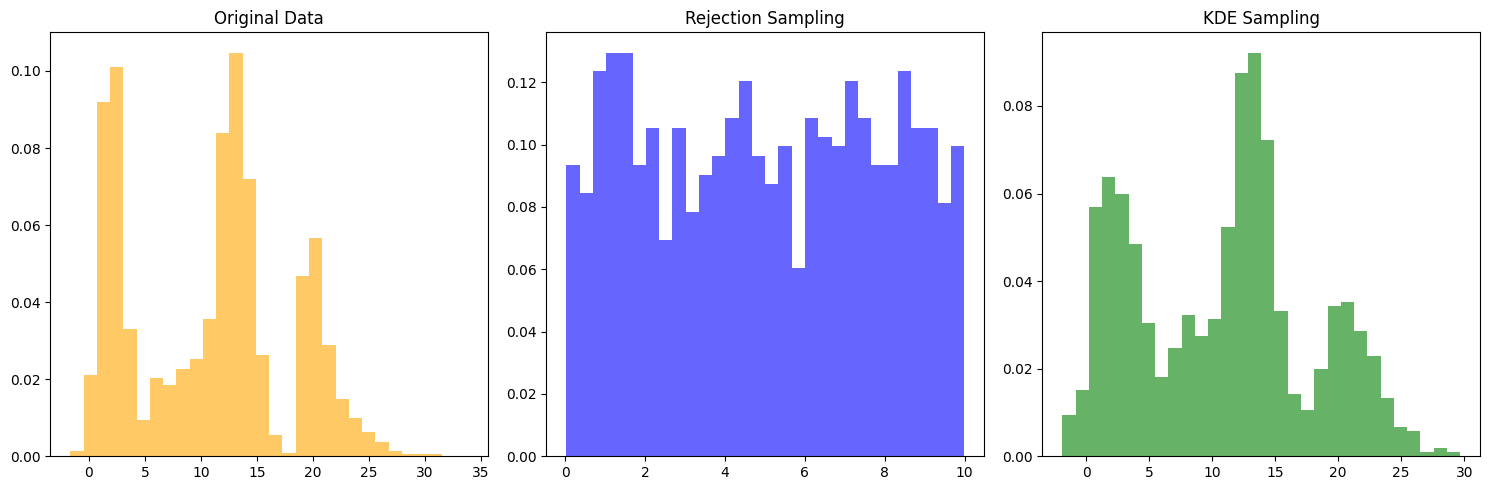

Original Data -> E[X]: 10.815081519923915 Var[X]: 49.40285913250296
Rejection Samples -> E[X]: 4.987371329540623 Var[X]: 8.414973207343879
KDE Samples -> E[X]: 10.834118651615963 Var[X]: 48.41006309300021
Original Data -> E[3x+2]: 34.445244559771744 E[x^2-5x]: 112.29343981548315 E[2e^x+1]: 258995194914.342
Rejection Samples -> E[3x+2]: 16.962113988621866 E[x^2-5x]: 8.351989338364557 E[2e^x+1]: 4289.262641131574
KDE Samples -> E[3x+2]: 34.502355954847886 E[x^2-5x]: 111.61759679221326 E[2e^x+1]: 25559319312.648514


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw5/complex_distribution.csv')

kde = stats.gaussian_kde(data['0'])

def rejection_sampling_kde(kde, n_samples=1000, x_range=(0, 10)):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(x_range[0], x_range[1])
        y = np.random.uniform(0, kde(x)[0])
        if y < kde(x)[0]:
            samples.append(x)
    return np.array(samples)

rejection_samples = rejection_sampling_kde(kde, n_samples=1000)

kde_samples = kde.resample(1000)[0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data['0'], bins=30, density=True, alpha=0.6, color='orange', label='Original Data')
plt.title("Original Data")

plt.subplot(1, 3, 2)
plt.hist(rejection_samples, bins=30, density=True, alpha=0.6, color='blue', label='Rejection Sampling')
plt.title("Rejection Sampling")

plt.subplot(1, 3, 3)
plt.hist(kde_samples, bins=30, density=True, alpha=0.6, color='green', label='KDE Sampling')
plt.title("KDE Sampling")

plt.tight_layout()
plt.show()

def calculate_statistics(samples):
    expectation = np.mean(samples)
    variance = np.var(samples)
    return expectation, variance

original_expectation, original_variance = calculate_statistics(data['0'])
print("Original Data -> E[X]:", original_expectation, "Var[X]:", original_variance)

rejection_expectation, rejection_variance = calculate_statistics(rejection_samples)
print("Rejection Samples -> E[X]:", rejection_expectation, "Var[X]:", rejection_variance)

kde_expectation, kde_variance = calculate_statistics(kde_samples)
print("KDE Samples -> E[X]:", kde_expectation, "Var[X]:", kde_variance)


def calculate_expectations(samples):
    e_3x_plus_2 = np.mean(3 * samples + 2)
    e_x2_minus_5x = np.mean(samples**2 - 5 * samples)
    e_2exp_x_plus_1 = np.mean(2 * np.exp(samples) + 1)
    return e_3x_plus_2, e_x2_minus_5x, e_2exp_x_plus_1

orig_e1, orig_e2, orig_e3 = calculate_expectations(data['0'])
print("Original Data -> E[3x+2]:", orig_e1, "E[x^2-5x]:", orig_e2, "E[2e^x+1]:", orig_e3)

rej_e1, rej_e2, rej_e3 = calculate_expectations(rejection_samples)
print("Rejection Samples -> E[3x+2]:", rej_e1, "E[x^2-5x]:", rej_e2, "E[2e^x+1]:", rej_e3)

kde_e1, kde_e2, kde_e3 = calculate_expectations(kde_samples)
print("KDE Samples -> E[3x+2]:", kde_e1, "E[x^2-5x]:", kde_e2, "E[2e^x+1]:", kde_e3)


# Question 5

Question 5. The following integral is not the easiest integral to integrate. The solution is approximately

Z 2
0
ln(x + 1) dx ≈ 1.29.

Use a sampling technique to obtain the same result.

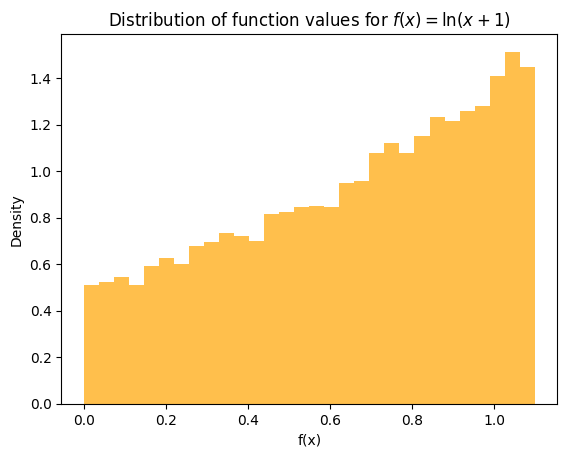

Integral approximation via sampling: 1.3012439008299406


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
    return np.log(x + 1)

# Step 1: Generate random samples from a uniform distribution between 0 and 2
n_samples = 10000
samples = np.random.uniform(0, 2, n_samples)

# Step 2: Evaluate the function at the sample points
f_samples = f(samples)

# Step 3: Compute the integral approximation using the professor's note
integral_approximation = (2 / n_samples) * np.sum(f_samples)

# Step 4: Plot histogram of the function values
plt.hist(f_samples, bins=30, alpha=0.7, color='orange', density=True)
plt.title(r"Distribution of function values for $f(x) = \ln(x + 1)$")
plt.xlabel("f(x)")
plt.ylabel("Density")
plt.show()

print("Integral approximation via sampling:", integral_approximation)


# Question 6

Question 6. Us the same logic and use sampling to approximate the integral

Z 1
0
x
2 − x + 1 dx

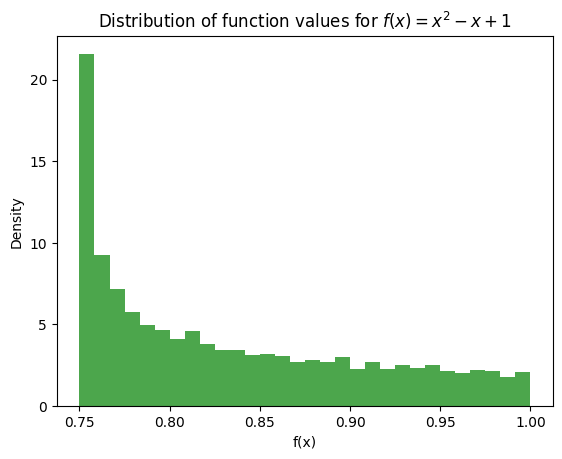

Integral approximation via sampling: 0.8333538362898367


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
    return x**2 - x + 1

# Step 1: Generate random samples from a uniform distribution between 0 and 1
n_samples = 10000
samples = np.random.uniform(0, 1, n_samples)

# Step 2: Evaluate the function at the sample points
f_samples = f(samples)

# Step 3: Compute the integral approximation using the same logic
integral_approximation = (1 / n_samples) * np.sum(f_samples)  # (1 - 0) * sum(f(x))

# Step 4: Plot histogram of the function values
plt.hist(f_samples, bins=30, alpha=0.7, color='green', density=True)
plt.title("Distribution of function values for $f(x) = x^2 - x + 1$")
plt.xlabel("f(x)")
plt.ylabel("Density")
plt.show()

print("Integral approximation via sampling:", integral_approximation)
